# Universidad Autónoma de Aguascalientes
# Departamento: Ciencias de la Computación
# Carrera: Ingeniería en Computación Inteligente
# Curso: Metaheurística I
# Maestro: Dr. Francisco Javier Luna Rosas
# Alumno: Jose Luis Sandoval Perez
# Semestre: Agosto - Diciembre 2024

## Práctica 11. Búsqueda Tabú.

### La búsqueda local es una técnica utilizada para resolver problemas de optimización donde la solución óptima se busca moviéndose iterativamente entre soluciones vecinas en el espacio de búsqueda.

### La búsqueda tabú es una técnica utilizada en la optimización para evitar que el algoritmo explore repetidamente las mismas soluciones, ayudando a escapar los mínimos locales al mantener una lista de soluciones "prohibidas" o tabú. En esta práctica implementaremos el algoritmo de Búsqueda Tabú para buscar el óptimo global de una función en 2D: f(x) = x^2 y lo graficamos.

### Paso 1. Importar las librerías necesarias.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

### Paso 2. Definimos la función objetivo.

In [2]:
def funcion_objetivo(x):
    return x ** 2

### Paso 3. Generar el vecindario (pequeñas variaciones de la solución actual).

In [3]:
def generar_vecindario(solucion_actual, rango=5):
    return [solucion_actual + random.uniform(-rango, rango) for _ in range(10)]

### Paso 4. Función para la Búsqueda Tabú.

In [4]:
def busqueda_tabu(sol_inicial, iteraciones, tamaño_tabu):
    solucion_actual = sol_inicial
    mejor_solucion = solucion_actual
    historial = [solucion_actual] # Almacenar el progreso de las soluciones
    lista_tabu = []

    for i in range(iteraciones):
        vecindario = generar_vecindario(solucion_actual)
        # Filtrar vecindario para no incluir soluciones tabú
        vecindario = [s for s in vecindario if s not in lista_tabu]

        # Evaluar las soluciones del vecindario y elegir la mejor
        mejor_vecino = min(vecindario, key=funcion_objetivo)

        # Si encontramos una mejor solución, la actualizamos
        if funcion_objetivo(mejor_vecino) < funcion_objetivo(mejor_solucion):
            mejor_solucion = mejor_vecino

        # Actualizamos la solución actual
        solucion_actual = mejor_vecino
        historial.append(solucion_actual)

        # Actualizamos la lista tabú
        lista_tabu.append(solucion_actual)
        if len(lista_tabu) > tamaño_tabu:
            lista_tabu.pop(0) # Mantener el tamaño de la lista tabú

    return mejor_solucion, historial


### Paso 5. Parámetros del algoritmo.

In [5]:
sol_inicial = random.uniform(-100, 100)
iteraciones = 50
tamaño_tabu = 50

### Paso 6. Ejecutamos la Búsqueda Tabú.

In [6]:
mejor_solucion, historial = busqueda_tabu(sol_inicial, iteraciones, tamaño_tabu)

# Resultados
print(f"Mejor solución encontrada: {mejor_solucion}")
print(f"Valor de la función objetivo: {funcion_objetivo(mejor_solucion)}")

Mejor solución encontrada: -0.02147543360333959
Valor de la función objetivo: 0.0004611942484514472


### Paso 7. Graficamos la Búsqueda Tabú.

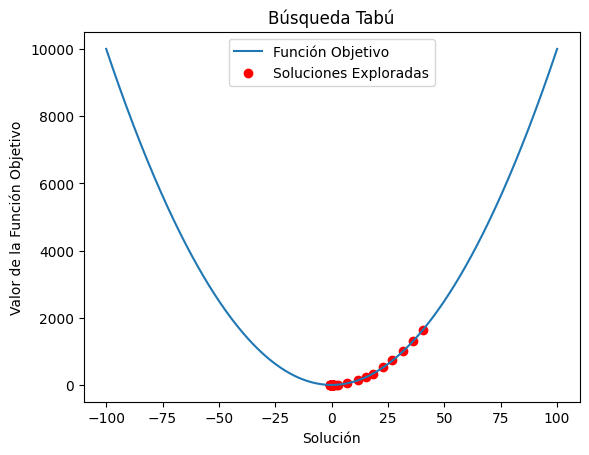

In [7]:
x = np.linspace(-100, 100, 400)
y = funcion_objetivo(x)

plt.plot(x, y, label="Función Objetivo")
plt.scatter(historial, [funcion_objetivo(s) for s in historial], color="red", label="Soluciones Exploradas")
plt.xlabel("Solución")
plt.ylabel("Valor de la Función Objetivo")
plt.title("Búsqueda Tabú")
plt.legend()
plt.show()

## Conclusiones
### En esta práctica implementamos el algoritmo de Búsqueda Tabú para buscar el óptimo global de una función en 2D: f(x) = x^2 y lo graficamos.

## Referencias
### Talbi, El-Ghazali (200). "Metaheuristics: from design to implementation" John Wiley & Sons, Inc. 2009. ISBN 978-0-470-27858-1